In [ ]:
#importing required libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/datasets/Fraud.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5786167 entries, 0 to 5786166
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 485.6+ MB


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,5.786167e+06,5.786167e+06,5.786166e+06,5.786166e+06,5.786166e+06,5.786166e+06,5.786166e+06,5.786166e+06
mean,2.167028e+02,1.813516e+05,8.447952e+05,8.667636e+05,1.092372e+06,1.220184e+06,7.733964e-04,6.913041e-07
std,1.156962e+02,6.191723e+05,2.931879e+06,2.968667e+06,3.324728e+06,3.624620e+06,2.779925e-02,8.314467e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+02,1.352223e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.280000e+02,7.563052e+04,1.381094e+04,0.000000e+00,1.361593e+05,2.191394e+05,0.000000e+00,0.000000e+00
75%,3.080000e+02,2.099438e+05,1.072598e+05,1.447654e+05,9.479836e+05,1.120393e+06,0.000000e+00,0.000000e+00
max,4.000000e+02,9.244552e+07,4.489219e+07,4.368662e+07,3.555534e+08,3.560159e+08,1.000000e+00,1.000000e+00


Missing value treatment

In [ ]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
data[data.isna().any(axis=1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5786166,400,PAYMENT,6798.25,C837,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
categorical = [i for i in data.columns if data[i].dtype=="O"]

In [ ]:
numerical = [i for i in data.columns if i not in categorical]

Outliers Treatment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


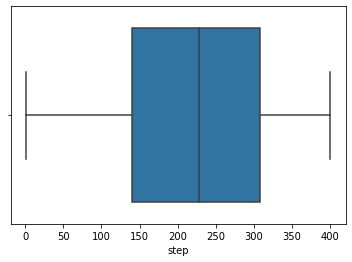

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


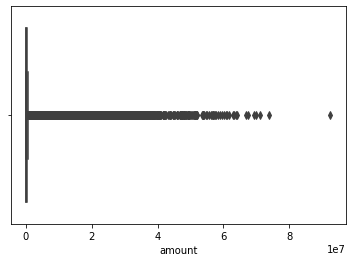

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


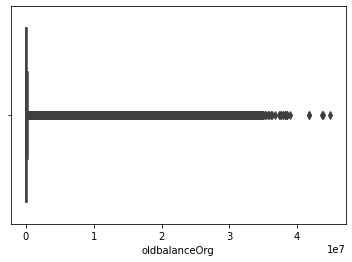

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


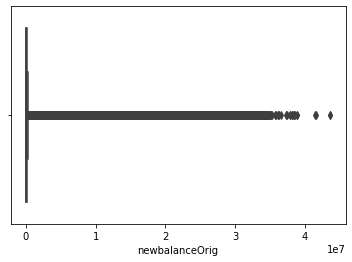

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


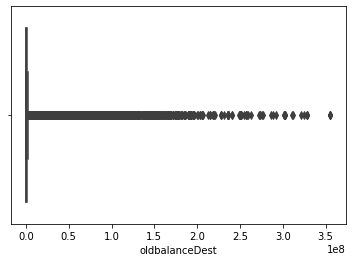

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


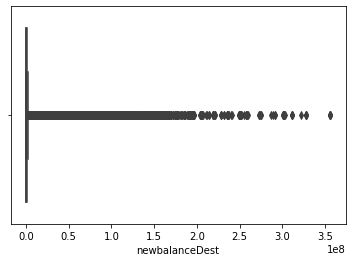

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


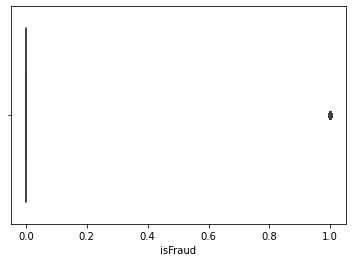

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


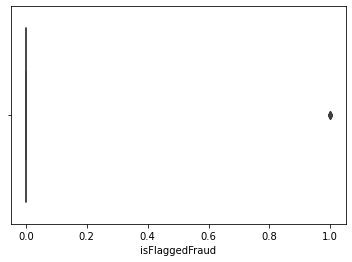

In [ ]:
for i in numerical:
  sns.boxplot(data[i])
  plt.show()

In [ ]:

def indicies_of_outliers(x):
 q1, q3 = np.percentile(x, [25, 75])
 iqr = q3 - q1
 lower_bound = q1 - (iqr * 1.5)
 upper_bound = q3 + (iqr * 1.5)
 return np.array(np.where((x > upper_bound) | (x < lower_bound))).size

In [ ]:
variables=[]
values=[]
for i in numerical:
  variables.append(i)
  values.append(indicies_of_outliers(data[i]))
dataoutliers=pd.DataFrame()
dataoutliers["variables"]=variables 
dataoutliers["values"]=values

In [ ]:
dataoutliers #outliers count

,variables,values
0,step,0
1,amount,306707
2,oldbalanceOrg,1012042
3,newbalanceOrig,958009
4,oldbalanceDest,710752
5,newbalanceDest,666606
6,isFraud,4475
7,isFlaggedFraud,4


In [ ]:
def outliers(x):
  q1, q3 = np.percentile(x, [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)
  return lower_bound,upper_bound

In [ ]:
data.isFraud.value_counts()

0.0    5781691
1.0       4475
Name: isFraud, dtype: int64

In [ ]:
lb,ub=outliers(data.amount)
df=data[(data.amount < lb) | (data.amount > ub)][["amount","isFraud"]]
df.isFraud.value_counts()

0.0    304651
1.0      2056
Name: isFraud, dtype: int64

In [ ]:
lb,ub=outliers(data.oldbalanceOrg)
df=data[(data.oldbalanceOrg < lb) | (data.oldbalanceOrg > ub)][["oldbalanceOrg","isFraud"]]
df.isFraud.value_counts()

0.0    1009386
1.0       2656
Name: isFraud, dtype: int64

In [ ]:
lb,ub=outliers(data.newbalanceOrig)
df=data[(data.newbalanceOrig < lb) | (data.newbalanceOrig > ub)][["newbalanceOrig","isFraud"]]
df.isFraud.value_counts()

0.0    957949
1.0        60
Name: isFraud, dtype: int64

In [ ]:
lb,ub=outliers(data.oldbalanceDest)
df=data[(data.oldbalanceDest < lb) | (data.oldbalanceDest > ub)][["oldbalanceDest","isFraud"]]
df.isFraud.value_counts()

0.0    710499
1.0       253
Name: isFraud, dtype: int64

In [ ]:
lb,ub=outliers(data.newbalanceDest)
df=data[(data.newbalanceDest < lb) | (data.newbalanceDest > ub)][["newbalanceDest","isFraud"]]
df.isFraud.value_counts()

0.0    666019
1.0       587
Name: isFraud, dtype: int64

In [ ]:
data.isFlaggedFraud.value_counts()

0.0    5786162
1.0          4
Name: isFlaggedFraud, dtype: int64

In [ ]:
data[data.isFlaggedFraud==1.0]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Fraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1.0,1.0,1.0
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1.0,1.0,1.0
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1.0,1.0,1.0
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1.0,1.0,1.0


In [ ]:
dummies=pd.get_dummies(data.type,drop_first=True)

In [ ]:
new_data=pd.concat([data,dummies],axis=1)

In [ ]:
new_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Fraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,0.0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,0.0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,1.0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,1.0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,0.0,0,0,1,0


In [ ]:
new_data.duplicated().sum()

0

In [ ]:
new_data.drop(["nameOrig","type","nameDest","isFlaggedFraud"],axis=1,inplace=True)

In [ ]:
new_data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1.0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1.0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,0,0,1,0


In [ ]:
new_data[new_data.isFraud==1].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
count,4475.000000,4.475000e+03,4.475000e+03,4.475000e+03,4.475000e+03,4.475000e+03,4475.0,4475.000000,4475.0,4475.0,4475.000000
mean,197.925140,1.403589e+06,1.509293e+06,1.105658e+05,4.850383e+05,1.196932e+06,1.0,0.502123,0.0,0.0,0.497877
std,116.473478,2.287076e+06,2.961291e+06,1.300478e+06,1.808944e+06,2.678756e+06,0.0,0.500051,0.0,0.0,0.500051
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000,0.0,0.0,0.000000
25%,93.000000,1.210358e+05,1.182874e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000,0.0,0.0,0.000000
50%,199.000000,4.265324e+05,4.203307e+05,0.000000e+00,0.000000e+00,8.111090e+03,1.0,1.000000,0.0,0.0,0.000000
75%,296.000000,1.521283e+06,1.516824e+06,0.000000e+00,1.534905e+05,1.029421e+06,1.0,1.000000,0.0,0.0,1.000000
max,400.000000,1.000000e+07,4.489219e+07,3.489219e+07,3.296166e+07,3.464570e+07,1.0,1.000000,0.0,0.0,1.000000


multi-collinearity

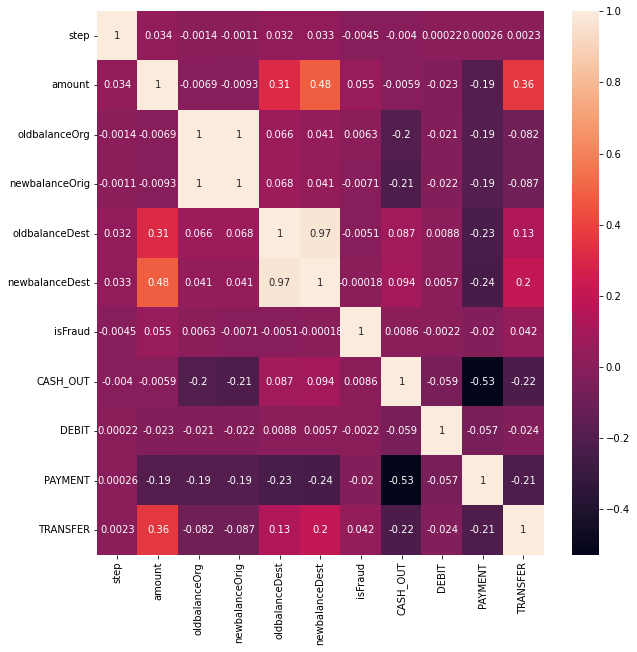

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(new_data.corr(),annot=True)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset

In [ ]:
cleaned_data=correlation(new_data,0.6)

In [ ]:
cleaned_data.head()
#features such as step	amount	oldbalanceOrg	oldbalanceDest	isFraud	CASH_OUT	DEBIT	PAYMENT	TRANSFER can be selected because of less collinearity

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,0.0,0.0,0,0,1,0
1,1,1864.28,21249.0,0.0,0.0,0,0,1,0
2,1,181.00,181.0,0.0,1.0,0,0,0,1
3,1,181.00,181.0,21182.0,1.0,1,0,0,0
4,1,11668.14,41554.0,0.0,0.0,0,0,1,0


the old balance destination has little suspicious data and this is one of the key factor in predicting fraudulant customer

In [ ]:
X=cleaned_data.drop("isFraud",axis=1)
y=cleaned_data.isFraud

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
model = XGBClassifier()
# define evaluation procedure
#cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=3, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % np.mean(scores))

Mean ROC AUC: 0.98542
